Quantum Computing
=====

Quantum computing is a type of computing that is based on the principles of quantum mechanics, which is a branch of physics that describes the behavior of matter and energy at the atomic and subatomic scale.

In a classical computer, information is stored in bits, which are represented by either 0s or 1s. Quantum computers, on the other hand, use quantum bits, or qubits, which can represent both 0s and 1s simultaneously. This property, known as superposition, allows quantum computers to perform certain types of calculations much faster than classical computers.

In addition to superposition, quantum computers also make use of another quantum mechanical phenomenon called entanglement, which allows the state of one qubit to be correlated with the state of another qubit, even if they are separated by large distances. This allows quantum computers to perform certain types of calculations that are not possible with classical computers.

Quantum computers are still in the early stages of development, and they are not yet widely available. However, they have the potential to solve certain types of problems much faster than classical computers, and they are being actively researched and developed by companies and research institutions around the world.

Flipping a Coin / Probability
=====

Understanding a coin flip can be useful for understanding quantum computing because it can help to illustrate some of the fundamental principles of quantum mechanics, which are the foundation of quantum computing.

In a classical interpretation of a coin flip, the coin has two possible outcomes: heads or tails. Before the coin is flipped, it is either in the "heads" state or the "tails" state, and after the flip, it is in one of these two states with probability 1. In other words, the state of the coin is determined before the flip and is not affected by any external factors.

In contrast, in quantum mechanics, the state of a system (such as a coin) is not determined until it is measured. This means that before the measurement, the coin is in a superposition of both the "heads" and "tails" states, and its state is only determined when it is observed. This idea is known as the uncertainty principle, and it is one of the fundamental principles of quantum mechanics.

This concept can be difficult to wrap our heads around because it goes against our classical intuition, but it is a key idea in quantum mechanics and is central to the operation of quantum computers.

In [1]:
import numpy as np
import seaborn as sns
import random
import itertools

In [3]:
np.random.binomial(1, 0.5) # Flip a Coin

0

In [4]:
np.random.binomial(1, 0.5, 100) # Flip a Coin, 100 times

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [7]:
np.random.binomial(100, 0.5) # Flip a Coin, 100 times, Iterating when lands on heads

56

<AxesSubplot:ylabel='count'>

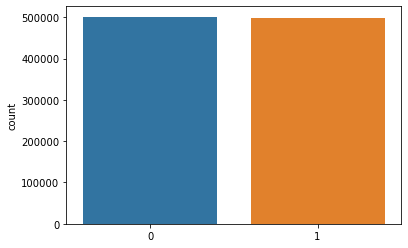

In [8]:
# Display Frequency Plot of 1mil Coin Flips
sns.countplot(x = np.random.binomial(1, 0.5, 1000000))

<AxesSubplot:ylabel='count'>

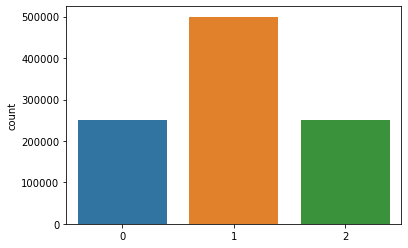

In [9]:
# Frequency of results when two coins are flipped 1mil times
sns.countplot(x = np.random.binomial(2, 0.5, 1000000))

<AxesSubplot:ylabel='count'>

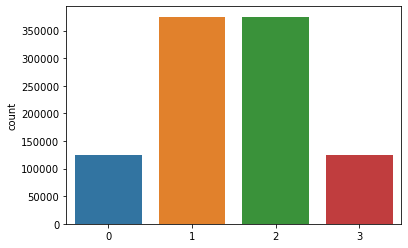

In [10]:
# Outcomes of flipping 3 coins
sns.countplot(x = np.random.binomial(3, 0.5, 1000000))

<AxesSubplot:ylabel='count'>

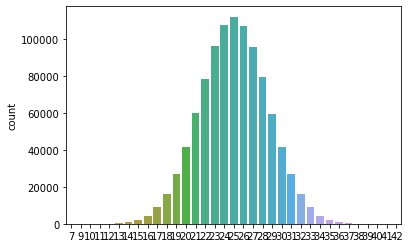

In [11]:
# Outcomes of Flipping 50 coins 1mil times
sns.countplot(x = np.random.binomial(50, 0.5, 1000000))

As you can see there is an equal distribution of results from the above *experiments*. This shows that no matter the amount of *bits* flipped at a single time, their results are deterministic based off of their *superposition*.

Quantum Gates
=====

Quantum gates are the basic building blocks of quantum circuits. They are used to perform quantum operations on qubits, which are the quantum analogs of classical bits (0, 1).

There are a range of Quantum Gates, each one performs a specific operation on the qubits it acts on, these include **X, Y, Z, H and T Gates**.

For Demonstration purposes I will be using the qiskit python package to show each Gate

In [3]:
import qiskit
import qiskit.visualization as viz

X Gate
=====
<hr/>

The X Gate, the NOT gate of quantum gates, is a gate that flips the state of a qubit from 0 to 1 and 1 to 0.

In [45]:
circuit = qiskit.QuantumCircuit(1,1) # Create circuit
circuit.initialize([0, 1], 0) # Set State to |1>
circuit.x(0) # Add X Gate
circuit.measure(0, 0) # Measure / Determine State of Gate
circuit.draw()

┌─────────────────┐┌───┐┌─┐
  q: ┤ Initialize(1,0) ├┤ X ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0

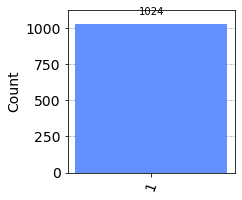

In [46]:
sim = qiskit.Aer.get_backend('aer_simulator') # Get a Simulator
result = sim.run(circuit).result().get_counts() # Simulate Circuit
viz.plot_histogram(result, figsize=(3, 3)) # Display on Histogram


Y Gate
=====
<hr/>

The Y gate is a quantum gate that rotates the state of a qubit around the Y axis of the Bloch sphere, which is a graphical representation of the state of a qubit. It is one of the basic building blocks of quantum circuits, and it is often used to perform logical operations on qubits.

The Y gate is represented by a matrix in quantum computing, and the matrix for the Y gate is given by:

[0 -i]
[i 0]

The Y gate acts on a single qubit, and when it is applied to a qubit, it rotates the state of the qubit around the Y axis of the Bloch sphere. The Y gate is closely related to the X gate and the Z gate, which are other basic quantum gates that are used to manipulate the state of qubits.

In [48]:
circuit = qiskit.QuantumCircuit(1, 1) # Create New Circuit
circuit.initialize([0, 1], 0) # Set State to |1>
circuit.y(0) # Add a Y Gate
circuit.measure(0, 0) # Measure / Determine State
circuit.draw() # Draw Circuit

┌─────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0,1) ├┤ Y ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0

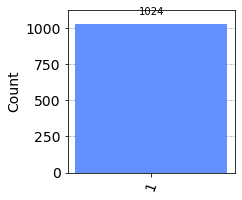

In [47]:
sim = qiskit.Aer.get_backend('aer_simulator') # Get Simulator
result = sim.run(circuit).result().get_counts( )# Simulate Above Circuit
viz.plot_histogram(result, figsize=(3, 3)) # Display Histogram 


Z Gate
=====
<hr/>

The Z gate is a quantum gate that rotates the state of a qubit around the Z axis of the Bloch sphere, which is a graphical representation of the state of a qubit. It is one of the basic building blocks of quantum circuits, and it is often used to perform logical operations on qubits.

The Z gate is represented by a matrix in quantum computing, and the matrix for the Z gate is given by:

[1 0]
[0 -1]

In [49]:
circuit = qiskit.QuantumCircuit(1, 1) # Create Circuit
circuit.initialize([0, 1], 0) # Set State to |1>
circuit.z(0) # Add Z Gate
circuit.measure(0, 0)
circuit.draw()

┌─────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0,1) ├┤ Z ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0

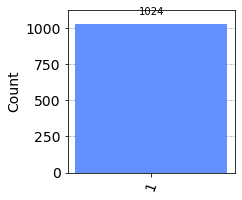

In [50]:
sim = qiskit.Aer.get_backend('aer_simulator') # Get Simulator
result = sim.run(circuit).result().get_counts() # Simulte the circuit.
viz.plot_histogram(result, figsize=(3, 3)) # Histogram.

H Gate
=====
<hr/>

The H gate is a quantum gate that transforms a qubit into a superposition of the 0 and 1 states. It is one of the basic building blocks of quantum circuits, and it is often used to perform logical operations on qubits.

The H gate is represented by a matrix in quantum computing, and the matrix for the H gate is given by:

[1 1]
[1 -1]

The H gate acts on a single qubit, and when it is applied to a qubit, it transforms the state of the qubit into a superposition of the 0 and 1 states. This means that the qubit is in both the 0 state and the 1 state simultaneously, and its state is not determined until it is measured.

In [51]:
circuit = qiskit.QuantumCircuit(1, 1) # Create circuit
circuit.initialize([0, 1], 0)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()

┌─────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0,1) ├┤ H ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0

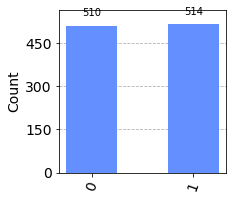

In [52]:
sim = qiskit.Aer.get_backend('aer_simulator')
result = sim.run(circuit).result().get_counts()
viz.plot_histogram(result, figsize=(3, 3))

T Gate
=====
<hr/>

The T gate is a quantum gate that rotates the state of a qubit around the T axis of the Bloch sphere, which is a graphical representation of the state of a qubit. It is one of the basic building blocks of quantum circuits, and it is often used to perform logical operations on qubits.

The T gate is represented by a matrix in quantum computing, and the matrix for the T gate is given by:

[1 0]
[0 e^(i*pi/4)]

In [53]:
circuit = qiskit.QuantumCircuit(1, 1)
circuit.initialize([0, 1], 0)
circuit.t(0)
circuit.measure(0, 0)
circuit.draw()

┌─────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0,1) ├┤ T ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0

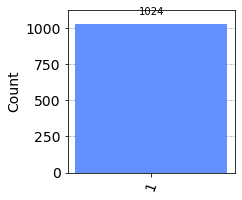

In [54]:
sim = qiskit.Aer.get_backend('aer_simulator')
result = sim.run(circuit).result().get_counts()
viz.plot_histogram(result, figsize=(3, 3))

Deutsch Algorithm
=====